In [68]:
#importing required libraries
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from matplotlib.pyplot import figure

#for reading stock data from the web
import pandas_datareader.data as web
from pandas_datareader import data

#timestamps
from datetime import datetime
from __future__ import division

In [69]:
#Using Yahoo and pandas to grab some data for some tech stocks

In [3]:
# creating list of tech stocks
tech_list = ['AAPL','GOOG','MSFT','AMZN']

# set up End and Start time fpr data grab
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

# 'For Loop' for grabbing yahoo finance data and setting it as a DataFrame
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = web.DataReader(stock,'yahoo',start,end)

### Basic Anlysis 

In [4]:
#summary
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,155.149397,151.877165,153.420512,153.586260,8.644263e+07,153.279372
std,16.099174,15.332467,15.758629,15.722916,2.566340e+07,15.894124
min,124.639999,122.250000,123.160004,122.769997,3.147366e+07,122.251930
25%,145.087494,142.735001,143.777504,144.637505,6.902330e+07,144.062012
50%,152.084999,149.770004,150.510002,150.980003,8.119655e+07,150.663872
75%,169.654995,165.384998,167.457497,166.524998,9.858352e+07,166.524998
max,182.940002,179.119995,182.630005,182.009995,1.954327e+08,181.778397


In [5]:
#general info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2021-05-03 to 2022-05-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       254 non-null    float64
 1   Low        254 non-null    float64
 2   Open       254 non-null    float64
 3   Close      254 non-null    float64
 4   Volume     254 non-null    float64
 5   Adj Close  254 non-null    float64
dtypes: float64(6)
memory usage: 13.9 KB


<AxesSubplot:xlabel='Date'>

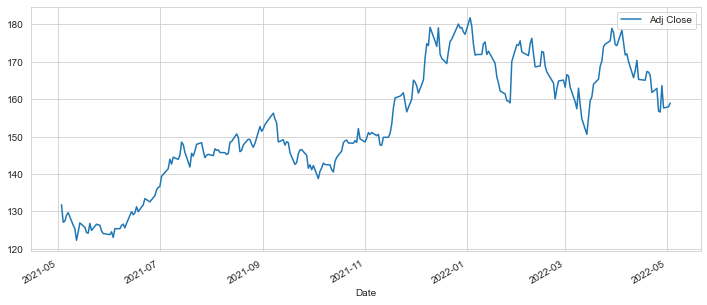

In [6]:
# plot out the volume and closing price of the stocks
AAPL['Adj Close'].plot(legend=True,figsize=(12,5))

<AxesSubplot:xlabel='Date'>

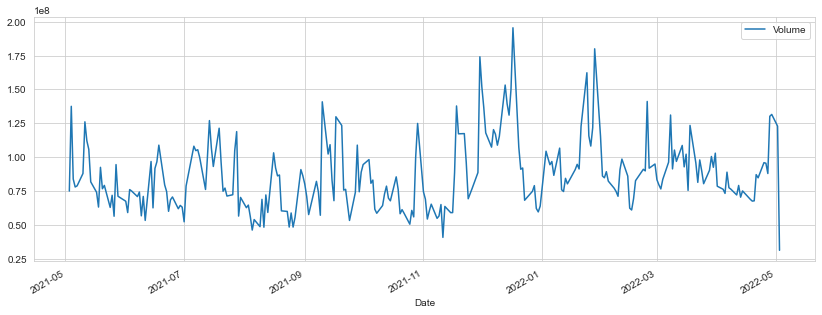

In [7]:
# plot the total volume of stock being traded each day over the past 5 years
AAPL['Volume'].plot(legend=True,figsize=(14,5))

In [8]:
#caculate the moving average for the stock AAPL
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma).mean()

<AxesSubplot:xlabel='Date'>

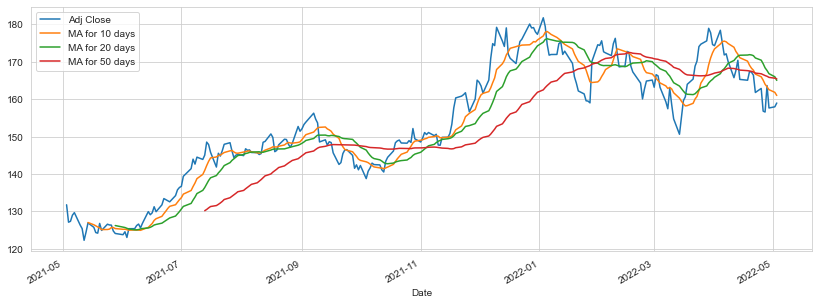

In [9]:
# plot all additional moving averages
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(14,5))

### Daily Return Analysis

In [10]:
#analyzing the risk of the stock

<AxesSubplot:xlabel='Date'>

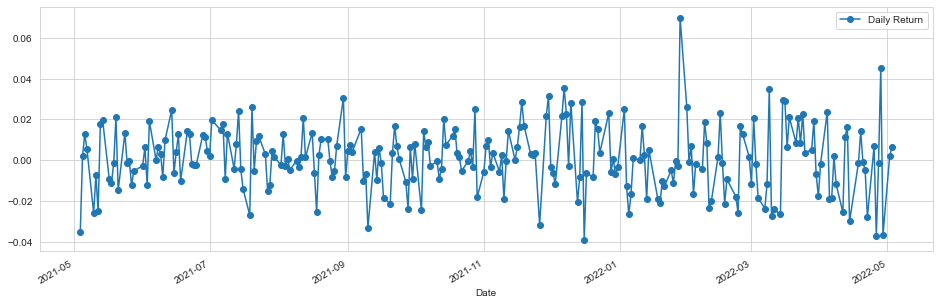

In [11]:
# pct_change to find the percent change for each day
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

#plot daily return percentage
AAPL['Daily Return'].plot(figsize=(16,5),legend=True,marker='o')

D:\Program Files\anaconda3\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


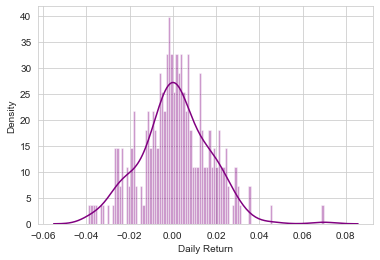

In [12]:
# average daily return using a histogram
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')
sns.set(rc={'figure.figsize':(10,6)})

In [13]:
#creating DataFrame with all the ['Close'] columns for each of the stocks dataframe
closing_df = web.DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']

In [14]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-05-03,131.756897,2395.169922,249.825073,3386.489990
2021-05-04,127.094612,2354.250000,245.787949,3311.870117
2021-05-05,127.343140,2356.739990,244.478607,3270.540039
2021-05-06,128.973465,2381.350098,247.712280,3306.370117
2021-05-07,129.660553,2398.689941,250.420227,3291.610107


In [15]:
# daily return for all the stocks
tech_returns = closing_df.pct_change()

D:\Program Files\anaconda3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


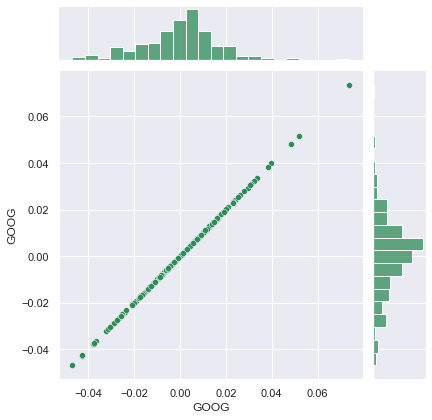

In [16]:
# comparing daily percentage return of two stocks to check how correlated
sns.jointplot('GOOG','GOOG',tech_returns,kind='scatter',color='seagreen')
sns.set(rc={'figure.figsize':(8,10)})

D:\Program Files\anaconda3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


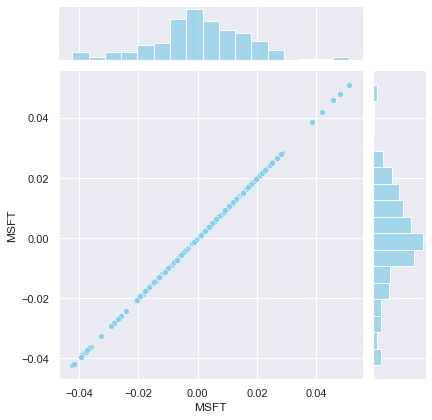

In [17]:
# MSFT stock
sns.jointplot('MSFT','MSFT',tech_returns,kind='scatter',color='skyblue')
sns.set(rc={'figure.figsize':(8,10)})

In [18]:
# CONCLUSION - we can see that if two stocks are perfectly (and positivley) correlated with each other 
#              a linear relationship bewteen its daily return values should occur. 

D:\Program Files\anaconda3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


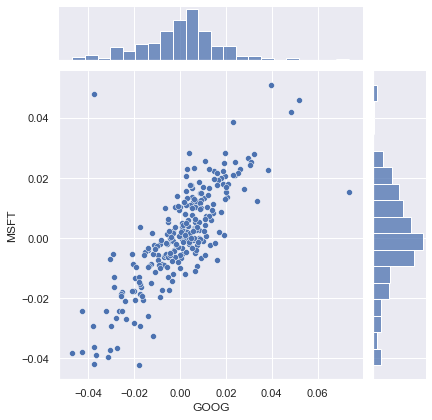

In [19]:
# comparing Google and Microsoft 
sns.jointplot('GOOG','MSFT',tech_returns,kind='scatter')
sns.set(rc={'figure.figsize':(8,10)})

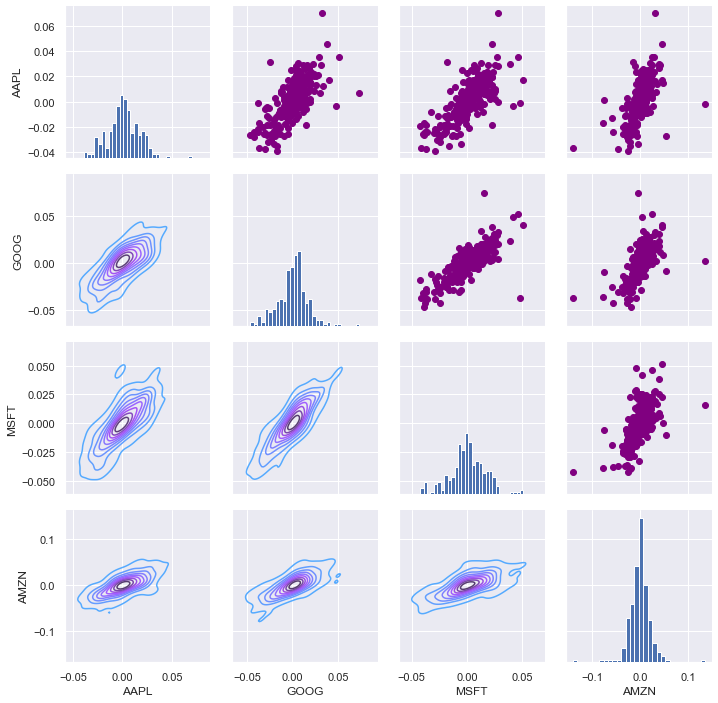

In [20]:
#finding correlation using PairGrid

# Set up figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(tech_returns.dropna())

# Using map_upper to specify what the upper triangle will look like
returns_fig.map_upper(plt.scatter,color='purple')

# efine the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)
sns.set(rc={'figure.figsize':(5,5)})

In [21]:
# CONCLUSION: 
#Above we can see all the relationships on daily returns between all the stocks.
#It also shows interesting correlation between Apple and Amazon daily returns.

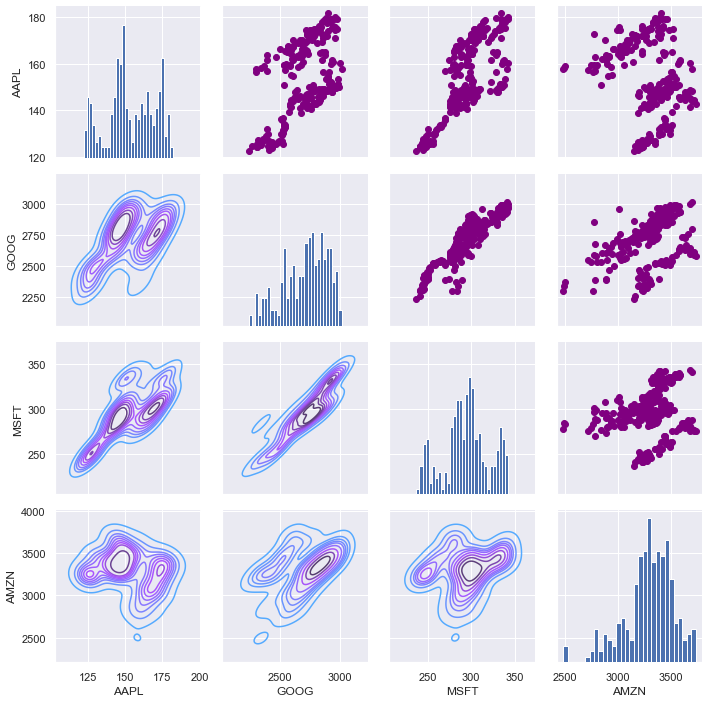

In [22]:
#Comparing closing prices

# Set up figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# define the diagonal as a series of histogram plots of the closing price
returns_fig.map_diag(plt.hist,bins=30)


In [23]:
#CONCLUSION :
# we see an interesting relationship between Amazon and Apple

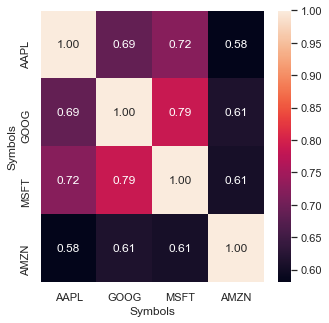

In [24]:
tech_returns_corr= tech_returns.dropna().corr()
sns.heatmap(tech_returns_corr, annot=True, fmt='.2f')
plt.show()
sns.set(rc={'figure.figsize':(8,5)})

In [25]:
#CONCLUSION:
# we  can see here that Amazon and Apple had the strongest correlation of daily stock return
# all the technology comapnies are positively correlated.

### Risk Analysis

In [26]:
# using the information we've gathered on daily percentage returns is by 
# comparing the expected return with the standard deviation of the daily returns.

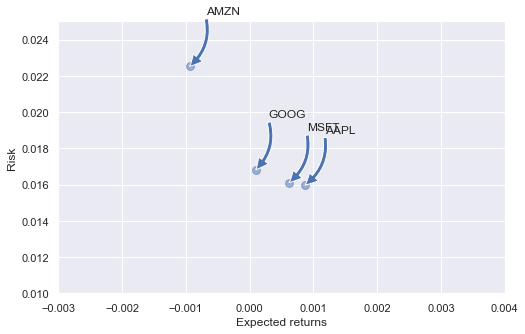

In [27]:
# creating a new dataframe
rets = tech_returns.dropna()
area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

#x and y limits of the plot
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

#plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

#labelling
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict( connectionstyle = 'arc3,rad=-0.3'))

In [28]:
#Value at Risk
#We can treat value at risk as the amount of money we could expect to lose for a given confidence interval.
#Using "bootstrap" method - we will calculate the empirical quantiles from a histogram of daily returns.

D:\Program Files\anaconda3\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

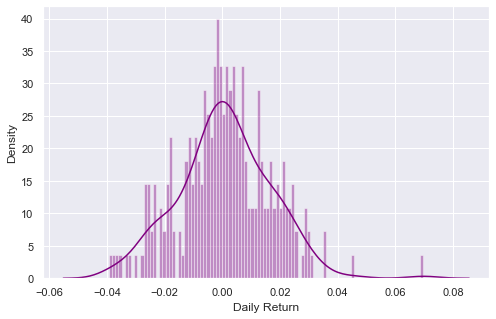

In [29]:
#creating hisogram for AAPL stocks
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [30]:
#using quantile to get the risk value for the stock

# The 0.05 empirical quantile of daily returns
rets['AAPL'].quantile(0.05)

-0.025828434622209028

In [31]:
#CONCLUSION:
#The 0.05 empirical quantile of daily returns is at -0.024. That means that with 95% confidence, our worst daily loss will 
#not exceed 2.4%. 
#If we have a 1 million dollar investment, our one-day 5% VaR is -0.024 * 1,000,000 = $24,000.

In [32]:
#finding risk value for MSFT stocks
rets['MSFT'].quantile(0.05)

-0.02867776906579249

In [33]:
#CONCLUSION:
#The 0.05 empirical quantile of daily returns is at -0.026. That means that with 95% confidence, our worst daily loss will 
#not exceed 2.6%. 
#If we have a 1 million dollar investment, our one-day 5% VaR is -0.026 * 1,000,000 = $26,000.

In [34]:
#finding risk value for GOOG stocks
rets['GOOG'].quantile(0.05)

-0.029534759858224624

In [35]:
#CONCLUSION:
#The 0.05 empirical quantile of daily returns is at -0.027. That means that with 95% confidence, our worst daily loss will 
#not exceed 2.7%. 
#If we have a 1 million dollar investment, our one-day 5% VaR is -0.027 * 1,000,000 = $27,000.

In [36]:
#finding risk value for AMZN stocks
rets['AMZN'].quantile(0.05)

-0.030067587386816273

In [37]:
#CONCLUSION:
#The 0.05 empirical quantile of daily returns is at -0.028. That means that with 95% confidence, our worst daily loss will 
#not exceed 2.8%. 
#If we have a 1 million dollar investment, our one-day 5% VaR is -0.028 * 1,000,000 = $28,000.

### Value at Risk using the Monte Carlo method

In [38]:
# Set up time horizon
days = 365

# delta
dt = 1/days

# mu (drift) from the expected return data we got for AAPL
mu = rets.mean()['GOOG']

# volatility of the stock from the std() of the average return
sigma = rets.std()['GOOG']

In [39]:
#create a function that takes in the starting price and number of days
#and uses teh sigma and mu we already calculated form out daily returns

In [ ]:
#This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array

In [58]:
def monte_carlo(start_price,days,mu,sigma):
    #price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in xrange(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1]+(price[x-1]*(drift[x]+shock[x]))
        
    return price        

In [59]:
# Using Google stocks

Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

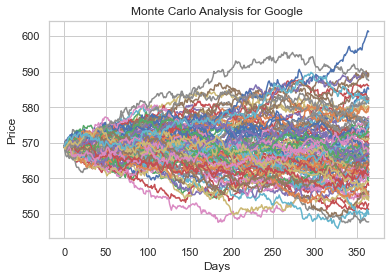

In [76]:
start_price = 569

for run in xrange(100):
    plt.plot(monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Monte Carlo Analysis for Google")

In [80]:
#histogram of the end results
runs = 1000

#create an empty matrix to hold the end price data
simulations = np.zeros(runs)

#set print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in xrange(runs):  
    # Set the simulation data point as the last stock price for that run
    simulations[run] = monte_carlo(start_price,days,mu,sigma)[days-1];

In [81]:
#we have our array of simulations, we can go ahead and plot a histogram as well as use qunatile to define our risk for 
#this stock.

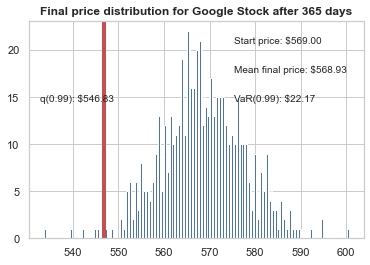

In [82]:
# define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');